In [1]:
import os
import sys
import utils
from matplotlib import pyplot as plt
%matplotlib inline

#import pipeline
%cd ..
import pipeline




/data/home/jfm1118/DA


## Get best model

129 experiments conducted
6 experiments conducted
(2, 3)


,model,valid_loss,activation,latent_dims,num_layers,total_channels,channels/layer,batch_norm,channels,conv_changeover,first_channel,learning_rate,path
103,CAE5,17618.527403,lrelu,72,6,73,12.166667,0.0,"[1, 8, 8, 16, 16, 16, 8]",0.0,8.0,0.003,/data/home/jfm1118/DA/experiments/CAE_zooBN/CA...
73,CAE5,18540.800167,lrelu,36,6,45,7.500000,0.0,"[1, 8, 8, 8, 8, 8, 4]",1.0,8.0,??,/data/home/jfm1118/DA/experiments/CAE_zoo2/17
109,CAE5,18767.225174,relu,36,6,69,11.500000,0.0,"[1, 8, 8, 16, 16, 16, 4]",0.0,8.0,0.001,/data/home/jfm1118/DA/experiments/CAE_zooBN/CA...
64,CAE6,18792.643163,lrelu,36,6,45,7.500000,0.0,"[1, 8, 8, 8, 8, 8, 4]",1.0,8.0,??,/data/home/jfm1118/DA/experiments/CAE_zoo2/13
76,CAE6,18846.080346,lrelu,72,6,49,8.166667,0.0,"[1, 8, 8, 8, 8, 8, 8]",1.0,8.0,??,/data/home/jfm1118/DA/experiments/CAE_zoo2/12
80,CAE5,19688.781409,lrelu,36,6,69,11.500000,0.0,"[1, 8, 8, 16, 16, 16, 4]",0.0,8.0,0.0006,/data/home/jfm1118/DA/experiments/CAE_zooBN/CA...


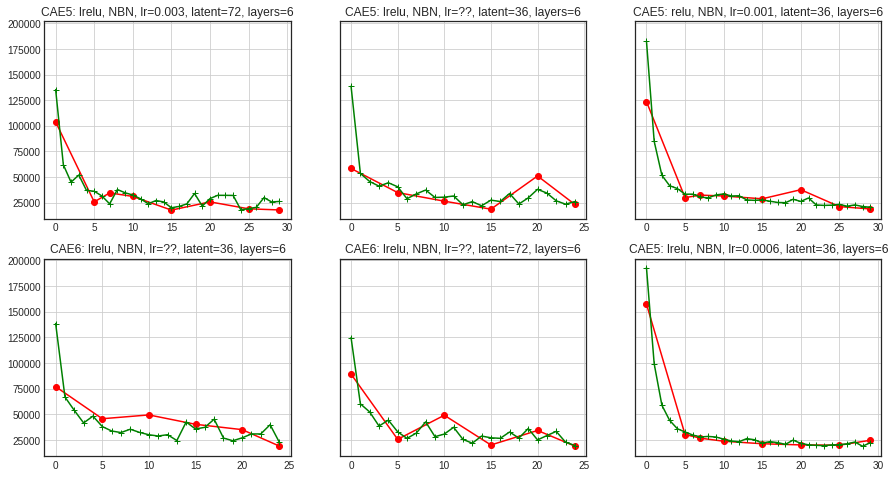

In [2]:
###CHANGE THIS FILE TO THE SUBDIRECTORY OF INTEREST:
exp_dir_base = "/data/home/jfm1118/DA/experiments"
##############

results = utils.extract_res_from_files(exp_dir_base)
df_res = utils.create_res_df(results, True)


#get best model(s)
nmodels = 6

best = df_res.loc[df_res["valid_loss"].nsmallest(nmodels).index]
paths = list(best.path.values)

#plot traing:
res_best = utils.extract_res_from_files(paths)
utils.plot_results_loss_epochs(res_best)

best

In [4]:
## best model is top middle (?) (final model). Index = 1
idx = 1 ##UPDATE THIS
fp_base = res_best[idx]["path"]
print(os.listdir(fp_base))
print(fp_base)
model_fp = fp_base + "/24.pth" ##UPDATE THIS
settings = res_best[idx]["settings"]


['24.pth', 'test.csv', '20.pth', 'train.csv', '15.pth', '0.pth', '10.pth', 'settings.txt', '5.pth']
/data/home/jfm1118/DA/experiments/CAE_zoo2/13


### Struggling to load - so train again

In [4]:
from pipeline import TrainAE
from pipeline.AEs import CAE_configs


epochs = 30
settings = CAE_configs.CAE6()
settings.BATCH_NORM = False
settings.CHANGEOVER_DEFAULT = 0

expdir = "experiments/DA/cae6"
trainer = TrainAE(settings, expdir)

model = trainer.train(epochs)


Number of parameters: 14299
lr: 0.003
epoch [1/8], loss:165214.3565
epoch [1/8], valid: -loss:112308.6161
epoch [2/8], loss:74302.5324
epoch [3/8], loss:52292.2931
epoch [4/8], loss:36651.2355
epoch [5/8], loss:31942.3020
epoch [6/8], loss:32212.3918
epoch [6/8], valid: -loss:32403.7525
epoch [7/8], loss:35132.2176
epoch [8/8], loss:34469.8613
epoch [8/8], valid: -loss:31767.4930
lr: 0.001
epoch [1/8], loss:192160.3224
epoch [1/8], valid: -loss:159533.1009
epoch [2/8], loss:133535.6286
epoch [3/8], loss:74909.5345
epoch [4/8], loss:52120.9866
epoch [5/8], loss:40069.2712
epoch [6/8], loss:38375.6521
epoch [6/8], valid: -loss:42042.6069
epoch [7/8], loss:36511.9918
epoch [8/8], loss:32372.1247
epoch [8/8], valid: -loss:31255.6925
lr: 0.009
epoch [1/8], loss:143080.9720
epoch [1/8], valid: -loss:115842.9737
epoch [2/8], loss:83870.4087
epoch [3/8], loss:55615.8372
epoch [4/8], loss:47045.0059
epoch [5/8], loss:52258.2179
epoch [6/8], loss:36177.5625
epoch [6/8], valid: -loss:66040.1628
e

In [5]:
#get models fp
from pipeline import TrainAE
from pipeline.AEs import CAE_configs
expdir = "experiments/DA/cae6"
settings = CAE_configs.CAE6()
settings.BATCH_NORM = False
settings.CHANGEOVER_DEFAULT = 0

print(os.listdir(expdir))
model_fp = settings.HOME_DIR + expdir + "/29.pth"
model_fp

['test.csv', '20.pth', '25.pth', '7-0.001.pth', 'train.csv', '15.pth', '0.pth', '10.pth', 'settings.txt', '5.pth', '7-0.003.pth', '29.pth']


'/data/home/jfm1118/DA/experiments/DA/cae6/29.pth'

### Perform DA

In [6]:

#get models fp
from pipeline import TrainAE
from pipeline.AEs import CAE_configs
expdir = "experiments/DA/cae6"
settings = CAE_configs.CAE6()
settings.BATCH_NORM = False
settings.CHANGEOVER_DEFAULT = 0

print(os.listdir(expdir))
model_fp = settings.HOME_DIR + expdir + "/29.pth"
model_fp
from pipeline import DAPipeline

settings.OBS_FRAC = 0.01  #1 % of observations
settings.OBS_VARIANCE = 0.01
settings.AE_MODEL_FP = model_fp
da = DAPipeline(settings)
w_opt = da.Var_DA_routine(settings)


<bound method DAPipeline.slow_jac_wrapper of <pipeline.DataAssimilation.DAPipeline object at 0x7f6653314908>>


/data/home/jfm1118/DA/pipeline/DataAssimilation.py:189: UserWarning: Using **Very** slow method of calculating jacobian. Consider disabling DA
  warnings.warn("Using **Very** slow method of calculating jacobian. Consider disabling DA", UserWarning)


AttributeError: 'function' object has no attribute 'to'